<a href="https://colab.research.google.com/github/DiegowAngel/Valores-At-picos/blob/main/Valores_Atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargamos csv
from google.colab import files
files.upload()
# Utilicé el método wget debido a que me resulta más cómodo que seleccionar el archivo desde mi ordenador

In [29]:
#Carga desde un archivo .csv
dt= pd.read_csv('DatosProcesados.csv')
dt

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
5,5,01/06/2017,29132.7,26365.4,2.913271e+07,2.876387e+07,3.688473e+05,2.913271e+07,1.056549e+07,7.337457e+06,...,7.911936e+06,1.083494e+06,3.322050e+06,2.883229e+06,9.522033e+05,3.451141e+05,4.277890e+06,1.001572e+06,1.893542e+06,2.358093e+06
6,6,01/07/2017,31182.3,27819.4,3.118230e+07,3.081531e+07,3.669907e+05,3.118230e+07,1.090591e+07,8.183012e+06,...,8.482568e+06,1.153102e+06,3.534097e+06,3.013144e+06,9.943436e+05,3.800082e+05,4.599798e+06,1.026743e+06,1.995091e+06,2.678009e+06
7,7,01/08/2017,31154.9,27394.1,3.115488e+07,3.076336e+07,3.915251e+05,3.115488e+07,1.104163e+07,7.899351e+06,...,8.275620e+06,1.147970e+06,3.604272e+06,2.946951e+06,1.060479e+06,3.701912e+05,4.585004e+06,7.864155e+05,1.882134e+06,3.234640e+06
8,8,01/09/2017,30521.5,26404.3,3.052151e+07,3.013560e+07,3.859105e+05,3.052151e+07,1.078917e+07,7.888243e+06,...,8.319868e+06,1.144159e+06,3.640337e+06,2.991425e+06,1.078616e+06,3.625737e+05,4.708172e+06,7.405727e+05,1.673424e+06,3.234640e+06
9,10,01/11/2017,33629.0,28425.3,3.362898e+07,3.312239e+07,5.065947e+05,3.362898e+07,1.165800e+07,8.324349e+06,...,8.282232e+06,1.138077e+06,3.641547e+06,3.032407e+06,1.206025e+06,3.696783e+05,4.988359e+06,8.648157e+05,2.729390e+06,3.079245e+06


In [ ]:
# Comprobamos que efectivamente no hay Nans
v_n=dt.isnull().sum()
v_n

In [30]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           57 non-null     int64  
 1   indice_tiempo                        57 non-null     object 
 2   ventas_precios_corrientes            57 non-null     float64
 3   ventas_precios_constantes            57 non-null     float64
 4   ventas_totales_canal_venta           57 non-null     float64
 5   salon_ventas                         57 non-null     float64
 6   canales_on_line                      57 non-null     float64
 7   ventas_totales_medio_pago            57 non-null     float64
 8   efectivo                             57 non-null     float64
 9   tarjetas_debito                      57 non-null     float64
 10  tarjetas_credito                     57 non-null     float64
 11  otros_medios                      

In [ ]:
#Filtro para obtener variables cuantitativas
cuant = dt.iloc[ : , [2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24]]
cuant

In [ ]:
#Filtro para obtener variables cualitativas
cuali = dt.iloc[ : , [1,13]]
cuali

<Figure size 1800x1500 with 0 Axes>

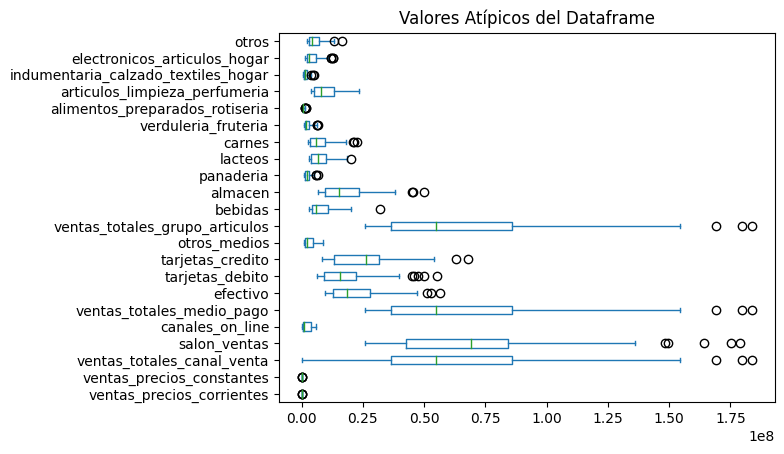

In [38]:
fig = plt.figure(figsize =(18, 15))
cuant.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
# Aplicamos Desviación Estándar
y= cuant
Lim_Sup= y.mean() + 2*y.std()
Lim_Inf= y.mean() - 2*y.std()
print("Limite superior permitido", Lim_Sup)
print("Limite inferior permitido", Lim_Inf)

In [ ]:
# Preocedemos a recolectar los datos sin los outliers
Data_sin_Outliers= cuant[(y<=Lim_Sup)&(y>=Lim_Inf)]
Data_sin_Outliers

In [ ]:
# Limpiamos la información al deshacernos de los nuevos valores nulos generados
data_f =Data_sin_Outliers.copy()
data_f=data_f.fillna(round(Data_sin_Outliers.mean(),1))
data_f

In [ ]:
val_n=data_f.isnull().sum()
val_n

In [ ]:
# Por último se unen los nuevos datos limpiados, con las variables cualitativas
dt_F = pd.concat([cuali, data_f], axis=1)
dt_F

In [61]:
# Descargamos el archivo
dt_F.to_csv("Dataframe_processado.csv")

In [63]:
from google.colab import files
files.download("Dataframe_processado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>